## Definiciones de código
ejecutar las proximas celdas antes que las próximas secciones

In [31]:
#@title Importar Bilioteca de Ploteo
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
#@title Importar Biblioteca de Audio
from IPython.display import Audio
from scipy.io import wavfile
from io import BytesIO

In [33]:
#@title Importar Biblioteca Interact
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [34]:
#@title Definir funciones auxiliares

print("ok 1!")

def normalizar(x):
  '''
    reescala los valores de entrada de manera que los valores
    de salida esten entre 0 y 1
  '''
  xn=x-min(x)
  xn=xn/max(xn)
  return xn


def normalizarb(x):
  '''
     reescala los valores de entrada de manera que los
     valores de salida esten entre -1 y 1
  '''
  xn=2*normalizar(x)-1
  return xn


def graft(x,fs,xlim):
    '''
       grafica en el dominio del tiempo
       primer argumento, arreglo de valores de la funcion en el tiempo
       tercer argumento, periodo a muestrear [t_inicial, t_final]
       segundo argumento, frecuencia de muestreo
    '''
    tmax = len(x)/fs
    t = np.arange(0, tmax, step=1. / fs)
    plt.plot(t, x)
    plt.xlim(xlim)
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud")


def graff1l(x,fs,xlim):
    '''
       grafica en el dominio de la frecuencia, espectro de un lado
       primer argumento, arreglo de valores de la funcion en el tiempo
       segundo argumento, frecuencia de muestreo
       entrega componentes en frecuencia (nros. complejos)
    '''
    N = len(x)
    X=np.fft.fft(x)/N
    freqs = np.arange(0, fs / 2, step=fs / N)
    plt.plot(freqs[:(N // 2)], 2*np.abs(X[:(N // 2)]))
    plt.xlabel("Frequencia (Hz)")
    plt.ylabel("Amplitud")
    plt.xlim(xlim)
    return X

def graff2l(x,fs,xlim):
    '''
       grafica en el dominio de la frecuencia, espectro de dos lados
       primer argumento, arreglo de valores de la funcion en el tiempo
       segundo argumento, frecuencia de muestreo
       entrega componentes en frecuencia (nros. complejos)
    '''
    N = len(x)
    X = np.fft.fft(x)/N
    # Plot the positive frequencies.
    freqsp = np.arange(0, fs / 2, step=fs / N)
    plt.plot(freqsp, np.abs(X[:(N // 2)]))
    # Plot the negative frequencies.
    freqsn = np.arange(-fs / 2, 0, step=fs / N)
    plt.plot(freqsn, np.abs(X[(N // 2):]))
    # Now we can label the x-axis.
    plt.xlabel("Frequencia (Hz)")
    plt.ylabel("Amplitud")
    plt.xlim(xlim)
    return X

def graff1lp(x,fs,xlim):
    '''
       grafica en el dominio de la frecuencia, espectro de un lado de potencias
       primer argumento, arreglo de valores de la funcion en el tiempo
       segundo argumento, frecuencia de muestreo
       entrega componentes en frecuencia (nros. complejos)
    '''
    N = len(x)
    X=np.fft.fft(x)/N
    X_p = np.abs(X) ** 2
    freqs = np.arange(0, fs / 2, step=fs / N)
    plt.plot(freqs[:(N // 2)], (X_p[:(N // 2)]))
    plt.xlim(xlim)
    plt.xlabel("Frequencia (Hz)")
    plt.ylabel("Potencia")
    plt.xlim(xlim)
    return X
  
def graff2lp(x,fs,xlim):
    '''
       grafica en el dominio de la frecuencia, espectro de dos lados de potencias
       primer argumento, arreglo de valores de la funcion en el tiempo
       segundo argumento, frecuencia de muestreo
    '''
    N = len(x)
    X = np.fft.fft(x)/N
    X_p = np.abs(X)**2
    # Plot the positive frequencies.
    freqsp = np.arange(0, fs / 2, step=fs / N)
    plt.plot(freqsp, X_p[:(N // 2)])
    # Plot the negative frequencies.
    freqsn = np.arange(-fs / 2, 0, step=fs / N)
    plt.plot(freqsn, X_p[(N // 2):])
    # Now we can label the x-axis.
    plt.xlabel("Frequencia (Hz)")
    plt.ylabel("Amplitud")
    plt.xlim(xlim)
    return X

def espectro(x,fs,xlim):
    '''
       grafica en el dominio de la frecuencia, espectro de dos lados de potencias en escala logaritmica
       primer argumento, arreglo de valores de la funcion en el tiempo
       segundo argumento, frecuencia de muestreo
    '''
    N = len(x)
    X = np.fft.fft(x)/N
    X_pl = np.log(np.abs(X)**2)
    # Plot the positive frequencies.
    freqsp = np.arange(0, fs / 2, step=fs / N)
    plt.plot(freqsp, X_pl[:(N // 2)])
    # Plot the negative frequencies.
    freqsn = np.arange(-fs / 2, 0, step=fs / N)
    plt.plot(freqsn, X_pl[(N // 2):])
    # Now we can label the x-axis.
    plt.xlabel("Frequencia (Hz)")
    plt.ylabel("Amplitud (log)")
    plt.xlim(xlim)
    return X

def pasabanda(X,fs,finf,fsup):
  '''
  Filtro pasa banda de las componetnes en frecuencia X
  con frecuencia de muestreo fs, y frecuencias inferior y superior
  de la banda de paso finf y fsup.
  '''

  #inversion de muestras de frecuencias
  X2=np.fft.fftshift(X)
  
  #calculo de indices componentes de frecuencias
  nc=len(X)
  ifni =int ( -fsup*nc/(fs) + nc//2)
  ifns= int (-finf*nc/(fs) + nc//2)
  ifpi=int ( finf*nc/(fs) + nc//2)
  ifps =int ( fsup*nc/(fs) + nc//2)
  #print(ifni,ifns,ifpi,ifps)

  #eliminacion de componentes fuera de la banda de paso
  X2[:ifni]=0
  X2[ifns:ifpi]=0
  X2 [ifps:]=0

  #inversion de muestras de frecuencias
  X3=np.fft.ifftshift(X2)
  return X3

print("ok 2!")

ok 1!
ok 2!


# Señales Banda Base
En este cuaderno se generarán distintas señales de banda base parametrizables, para poder analizar sus caracteristicas como energía, potencia, ancho de banda, etc.

Posteriormente (en otros cuadernos) utilizaremos estas funciones como mensajes o señal moduladora para estudiar el ancho de banda y energía de señales moduladas.

Las señales a estudiar seran sinusoides, triangular, cuadrada, audio, ruido, etc. 

## Señal Sinusoidal
Ver el cuaderno: https://colab.research.google.com/drive/1qfz79dYpDm0yaW_86Ngxyk2SshupudDz


## Señal Triangular y Diente de Sierra
1- Definir señales triangulares y dientes de sierra (crecientes y decrecientes) y graficar en el tiempo y frecuencia.

2- Describir los espectros y su relacion con el período de las señales.

3- Escuche las señales generadas y describa sus impresiones.

3- ¿Cual es el ancho de banda que contiene 90% de la energía de la señal? ¿Cual es su relación con el período de la señal?



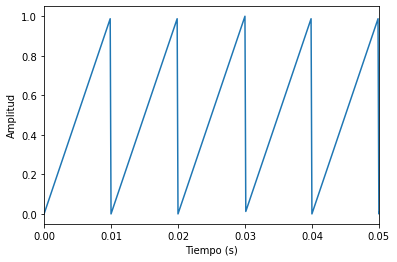

In [35]:
fs = 8000
tmax=5
t = np.arange(0, tmax, step=1. / fs)

periodo=.01

'''
cada vez que cambie el periodo anterior tengo que ejecutar
 todas las celdas del cuaderno, con menu "Entrono de ejecución" y "ejecutar todas"
 o bien con CTRL+F9
'''

xds = np.mod(t,periodo)   
xds  = normalizar(xds)

graft(xds,fs,[0,5*periodo])

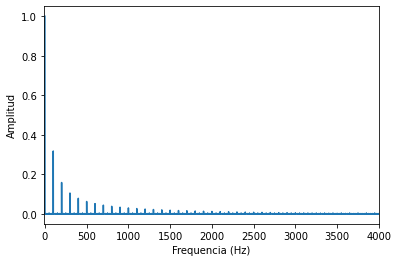

In [36]:
XDS=graff1l(xds,fs,[-10,4000]);

In [37]:
Audio(xds, rate=fs)

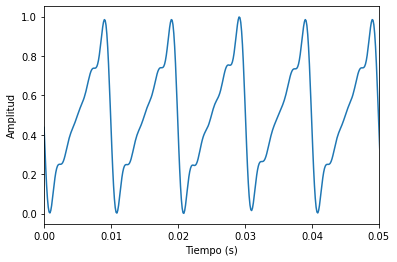

In [38]:
XDSF=pasabanda(XDS,fs,0,500) # filtramos los ultimos componentes de frecuencia (filtro pasa bajo ideal)
xdsf=np.real(np.fft.ifft(XDSF)*len(t));
graft(xdsf,fs,[0,5*periodo])


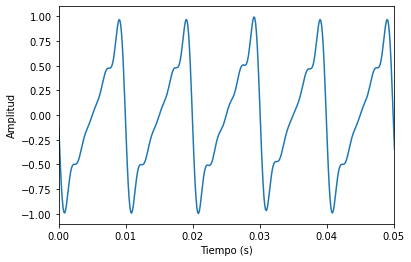

In [39]:
xdsfb=np.real(normalizarb(xdsf));
graft(xdsfb,fs,[0,5*periodo])

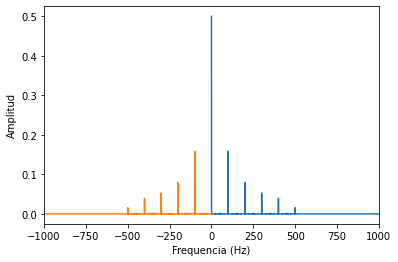

In [40]:
graff2l(xdsf,fs,[-1000,1000]);

## Ruido

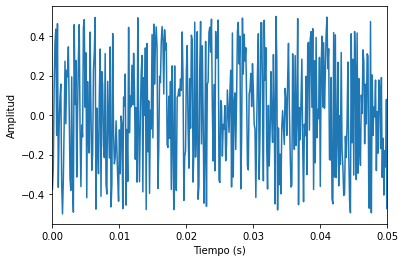

In [41]:
n=np.random.rand(len(t))-.5
graft(n,fs,[0,5*periodo])



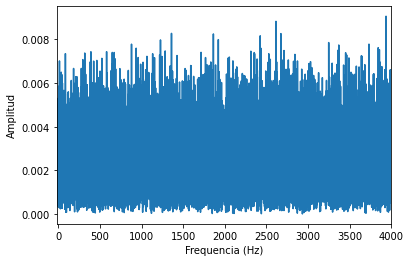

In [42]:
N=graff1l(n,fs,[-20,4000]);

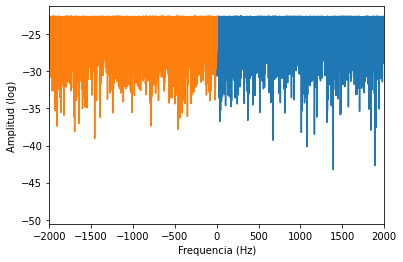

In [43]:
espectro(N,fs,[-2000,2000]);

In [44]:
Audio(n, rate=fs)

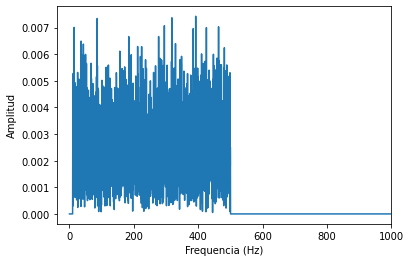

In [45]:

nc =len(N)

#limites de frecuencias pasabanda 0 a 500 Hz
N2=pasabanda(N,fs,10,500)

#retorno al dominio del tiempo
n2=np.real(np.fft.ifft(N2)*nc);
 
graff1l(n2,fs,[-40,1000]);


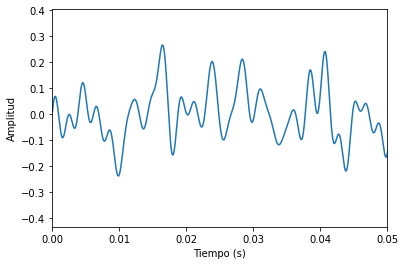

In [46]:
graft(n2,fs,[0,5*periodo])

In [47]:
Audio(n2, rate=fs)

# Modulación AM


## Batido de dos señales

Hacemos ahora el producto entre una sinusoidal y dos señales de banda base de ancho de banda limitada (filtrado). Este producto se llama comunmente batido.

**Actividad 1:** ¿Cuales son las frecuencias mínima y máxima de la señal sinusoidal, si la frecuencia de muestreo es de 8000sps y el ancho de banda de las señales en banda base es de 500Hz?

8000 sps --> 4000Hz

1000 y 3500 Hz de frecuencia de batido o portadora

1000-500>=500

3500+500<=4000


**Actividad 2:** ¿A que equivale, en el dominio del tiempo, la convolución de dos funciones F y G en el dominio de la frecuencia? 

$$F(f) * G(f) \leftrightarrow f(t) \cdot g(t)$$

**Actividad 3:** ¿Cual es el resultado de la convolución (en el dominio de la frecuencia) de una señal de banda limitada con una señal impulso?

Translacion en la frecuencia de la señal banda base a la frecuencia del impulso.

**Actividad 4:** ¿A que señal en el tiempo le corresponde un impulso en el dominio de la frecuencia?

le corresponde a una sinusoidal

**Actividad 5:** en base a las preguntas anteriores y al ejercicio propuesto, ¿Cual es el resultado esperado de batir una señal?

### Señal diente de sierra filtrada

Utilizaremos primero la señal diente de sierra filtrada unipolar **xdsf** (valores de 0 a 1) y luego la bipolar **xdsfb** (valores de -1 a 1)



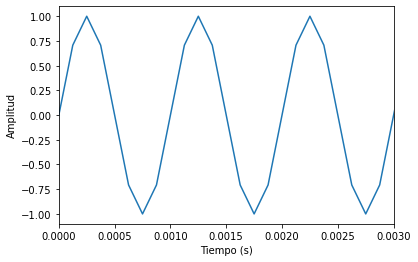

In [48]:
#frecuencia de portadora (cumplir los requisitos de actividad 1)
fc=1000
portadora=np.sin(2*np.pi*fc*t)
graft(portadora,fs,[0,3/fc]);

**Actividad 6:** ¿Cual es el periodo de la portadora y cuantas muestras se tiene por periodo, a la frecuencia de muestreo seleccionada?

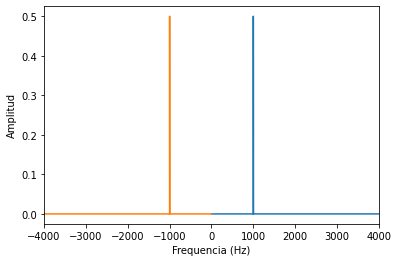

In [49]:
graff2l(portadora,fs,[-4000,4000]);

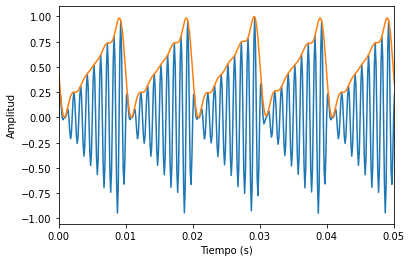

In [50]:
batido1=portadora*xdsf
graft(batido1,fs,[0, 5*periodo]);
graft(xdsf,fs,[0, 5*periodo]);


**Actividad 7:** Describa lo observado en el la imagen anterior del dominio del tiempo, considerando la escursion de la señal batida y la fase de la señal resultante.

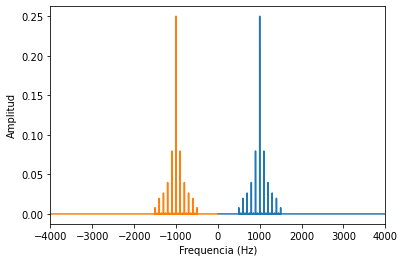

In [51]:
graff2l(batido1,fs,[-4000,4000]);

**Actividad 8:** Describa lo observado en la imagen anterior. ¿Como esta compuesto el espectro de la señal batida? ¿A que se debe la componente de frecuencia de mayor amplitud? (ver AM-SC)

**Actividad 9:** en la extresion general de modulación:
$$y(t)=A(t) \cdot sen(\omega \cdot t+\phi)=A(t) \cdot sen(2 \cdot \pi \cdot f \cdot t+\phi)$$

¿A que corresponde $A(t)$ en la simulación del batido? ¿y el segundo factor $sen(2 \cdot \pi \cdot f \cdot t+\phi)$? 

**Actividad 10:** Repita la simulación anterior para la señal diente de sierra filtrada bipolar **xdsfb** y describa lo observado en el dominio del tiempo, considerando la excursion de la señal batida y la fase de la señal resultante.

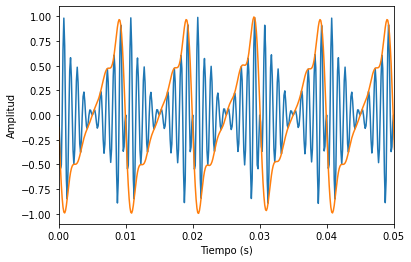

In [52]:
batido2=portadora*xdsfb
graft(batido2,fs,[0, 5*periodo]);
graft(xdsfb,fs,[0, 5*periodo]);

Comentario imagen

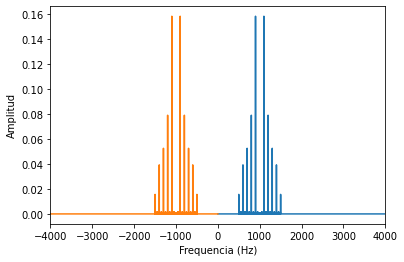

In [53]:
graff2l(batido2,fs,[-4000,4000]);

comentario imagen .- comparacion con la señal unipolar

## Señal ruido de banda limitada
  **Actividad 11:** Repetir la simulación anterior para la señal de ruido de banda limitada **n2**, describir lo observado en el dominio del tiempo y de la frecuencia


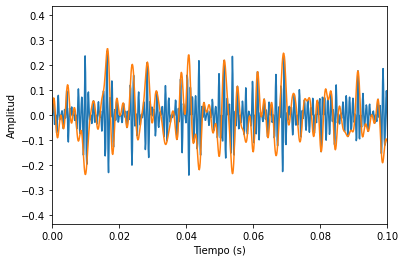

In [54]:
batido3=portadora*n2
graft(batido3,fs,[0, 10*periodo]);
graft(n2,fs,[0, 10*periodo]);

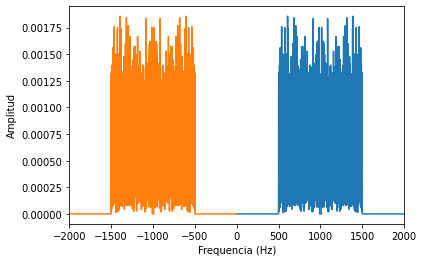

In [55]:
graff2l(batido3,fs,[-2000,2000]);

## Señal AM completa
La propieda fundamental del batido es la translación en frecuencia. Es matematicamente simple pero tiene dos probelemas principales:


*   Si la señal de banda limitada (mensaje) no tiene componente de continua, no aparece una frecuencia de portadora en el espectro final. Esto complica la sintonía del receptor.

*   Si la señal mensaje es bipolar, aparecen inversiones de fase y es mas dificil de recuperar a partir de la envolvente de la señal batida.

Para pasar estas limitaciones, se agregan dos elementos en la modulacion de amplitud $A(t)$ en

 $$y(t)=A(t) \cdot sen(2 \cdot \pi \cdot f \cdot t+\phi)$$

y haciendo $A(t)$:

$$A(t)=[1+m\cdot x(t)]$$

y descartando la fase constante $\phi$

nos queda:

 $$y_{AM}(t)=[1+m\cdot x(t)] \cdot sen(2 \cdot \pi \cdot f \cdot t)$$



(que es la equación de la modulacion de amplitud completa)





**Actividad 12:** ¿A que corresponden el termino **1** y el factor $m$?

Simulamos ahora la modulacion AM con la señal **xdsfb** :

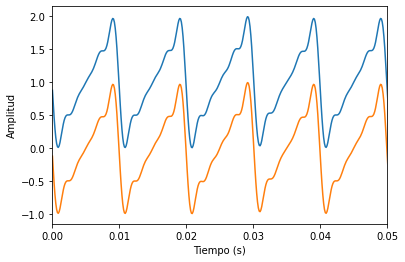

In [56]:
m=1 
a = 1+m*xdsfb   # 1 + m * mensaje
graft(a,fs,[0,5*periodo])
graft(xdsfb,fs,[0,5*periodo])



**Actividad 12:** Describa la señal ploteada **a** y su relacion con el mensaje original **xdsfb**. ¿Que sucede si cambiamos el valor de m por 2, 0.5 y -1? ¿como afectarían estos casos la fase del batido?

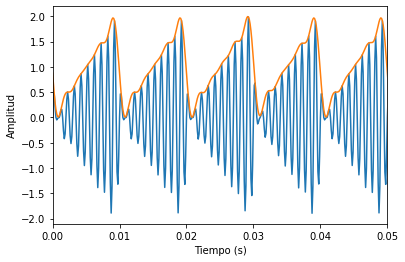

In [57]:
yam=a * portadora  # (1  + m * x) * portadora = 1 * portadora + m * x * portadora
graft(yam, fs, [0, 5*periodo]);
graft(a,fs,[0,5*periodo])
#graft(xdsfb,fs,[0,5*periodo])


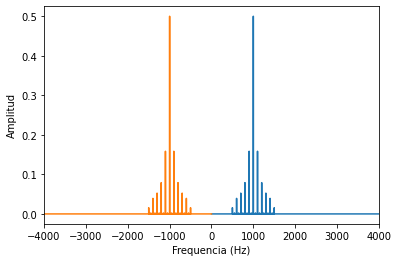

In [58]:
YAM=graff2l(yam,fs,[-4000,4000])

**Actividad 13:** describa la imagen anterior


**Actividad 14:** multiplique la señal modulada por la portadora nuevamente (doble batido) , grafique y describa el espectro.

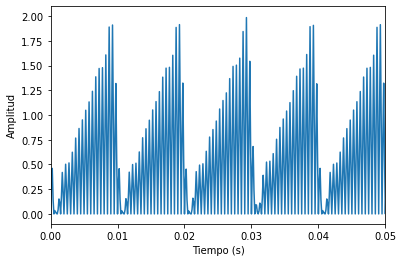

In [59]:
ydb=yam*portadora; # ((1+mx)portadora)*portadora = (1+mx) * portadora^2 = 
graft(ydb,fs,[0,5*periodo]);

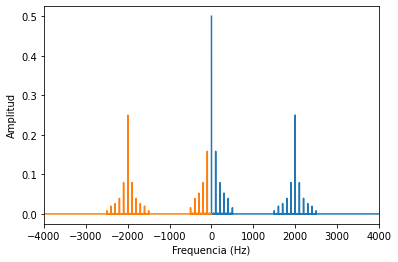

In [60]:
YDB=graff2l(ydb,fs,[-4000,4000])

describir espectro anterior

$$f_c \pm f_c = 2\cdot f_c ; 0 $$  



**Actividad 15:** a la señal obtenida por doble batido, aplique un filtro pasabajo y antitransforme. Explique lo realizado.

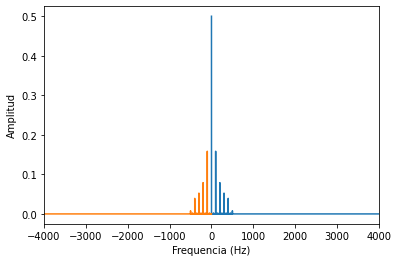

In [61]:
YDBF=pasabanda(YDB,fs,0,500);  # dejo solo banda base 0 - 500 Hz

ydbf=np.real(np.fft.ifft(YDBF)*len(YDBF));  #antitransformada de la señal doble batido filtrada

graff2l(ydbf,fs,[-4000,4000]);

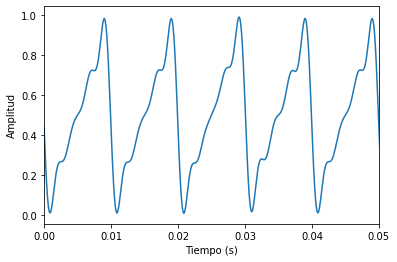

In [62]:
graft(ydbf,fs,[0,5*periodo])

**Actividad 16:** Compare AM completa y AM-SC desde el punto de vista de la potencia y ancho de banda de transmisión. 

In [ ]:
def Potencia(x,fs):
  